# Задание 1

Исходные данные:

In [1]:
import pandas

datas= pandas.read_csv('Davis.csv', index_col=0)
pandas.get_dummies(datas, columns=['sex'])

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


# Разделить датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов

Вычислим пропорцию полов в исходном датасете и полученных выборках:

In [2]:
def count_rel(df):
    man = (df["sex_F"] <= 0).sum()
    women=(df["sex_M"] <= 0).sum()
    return man/(women+man)
df=pandas.get_dummies(datas, columns=['sex'])
print(count_rel(df))


0.44


In [3]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.5, stratify=df['sex_M'])
print(count_rel(train))
print(count_rel(test))

0.44
0.44


# Очистить выборки от выбросов - людей с нереалистичным ростом /весом

Посмотрим, в каких столбцах встречаются NaN значения

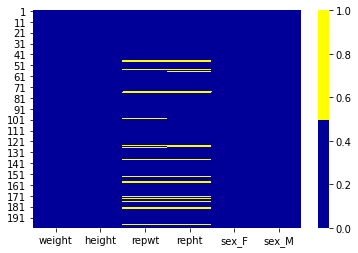

In [4]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Посмотрим описание значений столбцов

In [5]:
df[cols].describe()

,weight,height,repwt,repht,sex_F,sex_M
count,200.000000,200.000000,183.000000,183.000000,200.000000,200.000000
mean,65.800000,170.020000,65.622951,168.497268,0.560000,0.440000
std,15.095009,12.007937,13.776669,9.467048,0.497633,0.497633
min,39.000000,57.000000,41.000000,148.000000,0.000000,0.000000
25%,55.000000,164.000000,55.000000,160.500000,0.000000,0.000000
50%,63.000000,169.500000,63.000000,168.000000,1.000000,0.000000
75%,74.000000,177.250000,73.500000,175.000000,1.000000,1.000000
max,166.000000,197.000000,124.000000,200.000000,1.000000,1.000000


Построим столбчатые диаграммы каждого столбца, чтобы понять, какие значения являются неадекватными относительно других

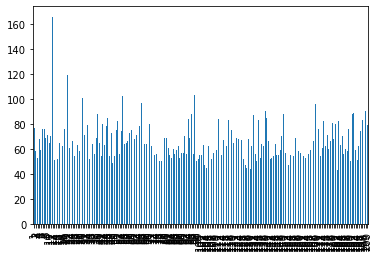

In [6]:
df['weight'].plot.bar()

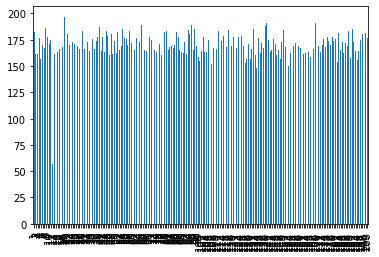

In [7]:
df['height'].plot.bar()

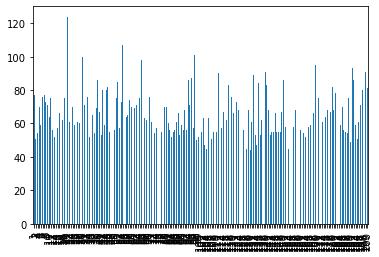

In [8]:
df['repwt'].plot.bar()

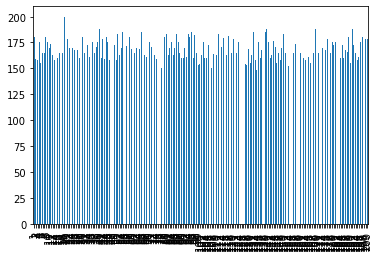

In [9]:
df['repht'].plot.bar()

Построим точечные графики зависимости роста от веса у мужчин и женщин, чтобы выявить неадекватные значения

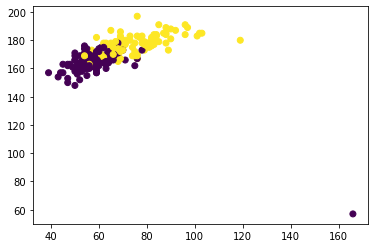

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["weight"],df['height'], c= df['sex_M'])

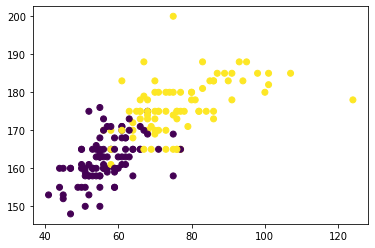

In [11]:
plt.scatter(df['repwt'], df['repht'], c= df['sex_M'])

Очистим train/test от вбросов и неопределенных значений

In [12]:
from scipy import stats
import numpy as np
train=train.dropna(axis=0)
train=train[(np.abs(stats.zscore(train)) < 2).all(axis=1)]
train

,weight,height,repwt,repht,sex_F,sex_M
71,62,175,61.0,171.0,1,0
153,47,150,45.0,152.0,1,0
129,68,171,68.0,169.0,1,0
84,60,167,55.0,163.0,1,0
116,62,168,62.0,163.0,1,0
...,...,...,...,...,...,...
18,62,168,62.0,165.0,1,0
68,64,164,62.0,161.0,1,0
81,61,165,60.0,163.0,1,0
2,58,161,51.0,159.0,1,0


In [13]:
test=test.dropna(axis=0)
test=test[(np.abs(stats.zscore(test)) < 2).all(axis=1)]
test

,weight,height,repwt,repht,sex_F,sex_M
123,68,178,68.0,175.0,1,0
34,52,164,52.0,161.0,1,0
29,39,157,41.0,153.0,1,0
78,63,160,64.0,158.0,1,0
184,63,165,59.0,160.0,1,0
...,...,...,...,...,...,...
61,68,165,69.0,165.0,0,1
113,55,174,57.0,171.0,1,0
106,53,164,51.0,160.0,1,0
79,69,182,70.0,180.0,0,1


# Отобразить train-выборку в виде точек на графике

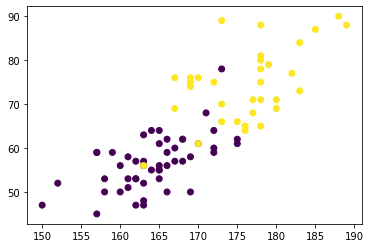

In [14]:
plt.scatter(train['height'], train['weight'], c= train['sex_M'])

# Построить гистограммы:

Роста и веса в целом

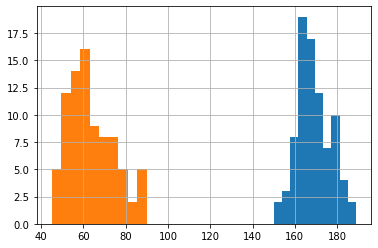

In [15]:
train['height'].hist()
train["weight"].hist()

Роста и веса мужчин

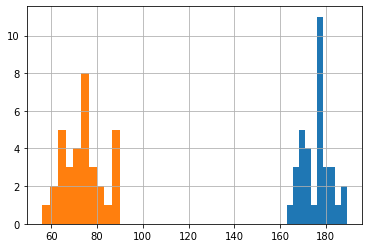

In [16]:
train_man= train.loc[train['sex_M'] ==1]
train_man['height'].hist()
train_man["weight"].hist()

Роста и веса женщин

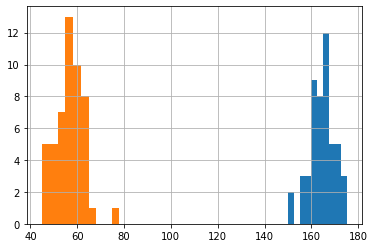

In [17]:
train_woman= train.loc[train['sex_M'] !=1]
train_woman['height'].hist()
train_woman["weight"].hist()

Величины (repwt - weight) в целом

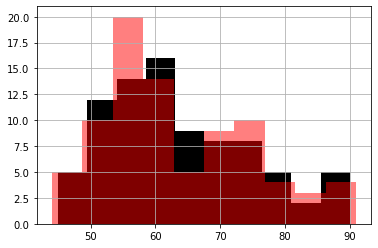

In [18]:
train["weight"].hist(color='r',fc=(0, 0, 0, 1))
train['repwt'].hist(fc=(1, 0, 0, 0.5), ls='dashed')

Величины (repwt - weight) мужчин

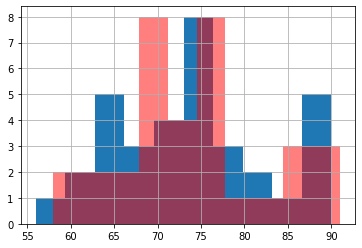

In [19]:
train_man["weight"].hist()
train_man['repwt'].hist(fc=(1, 0, 0, 0.5), ls='dashed')

Величины (repwt - weight) женщин

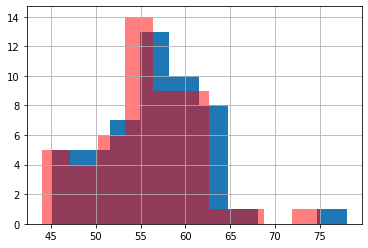

In [20]:
train_woman["weight"].hist()
train_woman['repwt'].hist(fc=(1, 0, 0, 0.5), ls='dashed')

Величины (repht - height) в целом

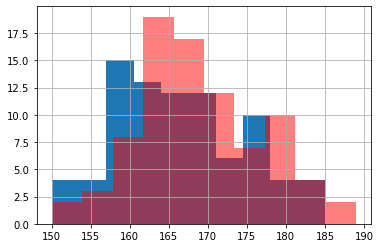

In [21]:
train['repht'].hist()
train["height"].hist(fc=(1, 0, 0, 0.5), ls='dashed')

Величины (repht - height) мужчин

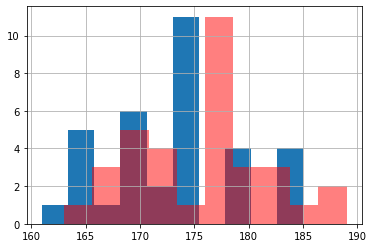

In [22]:
train_man['repht'].hist()
train_man["height"].hist(fc=(1, 0, 0, 0.5), ls='dashed')

Величины (repht - height) женщин

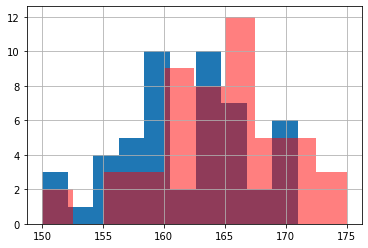

In [23]:
train_woman['repht'].hist()
train_woman["height"].hist(fc=(1, 0, 0, 0.5), ls='dashed')

# Построить генератор данных (sex, height, weight) 

Обращаемся к функции вычисления вероятности пола. Из дискретного распределения с определенной вероятностью выбирается пол.

In [24]:
def make_Sex(p_):
    sex_W_arr=np.random.choice([0,1],100, p=[p_, 1-p_])
    sex_M_arr=np.abs(sex_W_arr-1)

    return [sex_W_arr,sex_M_arr]

In [25]:
def getDisp(df):
    std_=df.std()
    print("Дисперсия: ", std_**2)
    return std_**2
def getMean(df):
    mean_= df.mean()
    return mean_
def getCov(df_h,df_w):
    mean_h=getMean(df_h)
    print("Cреднее значение роста: ", mean_h)
    mean_w= getMean(df_w)
    print("Cреднее значение веса: ", mean_w)
    cov_=np.mean((df_h-mean_h)*(df_w-mean_w))
    print("Ковариация: ", cov_)
    return cov_

In [26]:
def generate_H_W(df):
    D_h=getDisp(df['height'])
    D_w=getDisp(df['weight'])
    mean_h=getMean(df['height'])
    mean_w=getMean(df['weight'])
    cov_=getCov(df['height'],df['weight'])
    X_= np.random.multivariate_normal([mean_h, mean_w], [[D_h, cov_],[cov_,D_w]],size=100)
    return X_

In [27]:
def generate(df_w, df_m, p_):
    X_woman=generate_H_W(df_w)
    X_man=generate_H_W(df_m)
    
    sex_W_arr, sex_M_arr=make_Sex(p_)
    data={}
    heights_all=[]
    weights_all=[]


    for i in range(100):
        if sex_W_arr[i]==1:
            need= X_woman[i]
        else:
             need= X_man[i]
        heights_all.append(need[0])
        weights_all.append(need[1])    
    
    data['height']=heights_all
    data['weight']=weights_all   
    data["sex_F"]=sex_W_arr
    data["sex_M"]=sex_M_arr  
    generated_df=pandas.DataFrame(data)
    return generated_df


In [28]:
def getPDF(df):
    mean_new=getMean(df['height'])
    mean_new2=getMean(df['weight'])
    D_new=getDisp(df['height'])
    D_new2=getDisp(df['weight'])
    Cov_new= getCov(df['height'],df['weight'])
    pdf = scipy.stats.multivariate_normal.pdf(matrix,mean=[mean_new, mean_new2],cov=[[D_new, Cov_new],[Cov_new,D_new2]])
    return pdf
    


Разбиваем датасет на М и Ж, чтобы генерировать данные в дальнейшем в зависимости от пола

In [29]:
for_generation_woman=train_woman.drop(['repwt', 'repht','sex_M'], axis='columns')
for_generation_woman[:5]

,weight,height,sex_F
71,62,175,1
153,47,150,1
129,68,171,1
84,60,167,1
116,62,168,1


In [30]:
for_generation_man=train_man.drop(['repwt', 'repht','sex_F'], axis='columns')
for_generation_man[:5]

,weight,height,sex_M
58,73,183,1
7,76,167,1
95,88,189,1
70,80,178,1
56,65,176,1


In [31]:
p_=count_rel(df)
generated_df=generate(for_generation_woman, for_generation_man,p_)

Дисперсия:  28.54081632653062
Дисперсия:  37.36489795918366
Cреднее значение роста:  164.3
Cреднее значение веса:  56.68
Ковариация:  18.696
Дисперсия:  38.0686274509804
Дисперсия:  74.21122994652406
Cреднее значение роста:  175.85294117647058
Cреднее значение веса:  73.97058823529412
Ковариация:  28.907439446366784


In [32]:
generated_df

,height,weight,sex_F,sex_M
0,161.937523,62.192034,1,0
1,179.280979,82.690966,0,1
2,164.457022,51.346372,1,0
3,185.176469,84.119774,0,1
4,174.084125,79.887690,0,1
...,...,...,...,...
95,181.337661,76.040450,0,1
96,181.980417,79.286199,0,1
97,178.197669,76.231081,0,1
98,177.735680,80.666026,0,1


Построим точечный график для получившейся зависимости веса от роста у мужчин

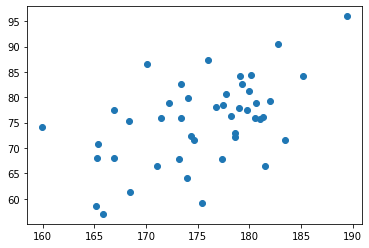

In [33]:
gen_man= generated_df.loc[generated_df['sex_M'] ==1]
plt.scatter(gen_man['height'],gen_man["weight"])


Построим точечный график для получившейся зависимости веса от роста у женщин

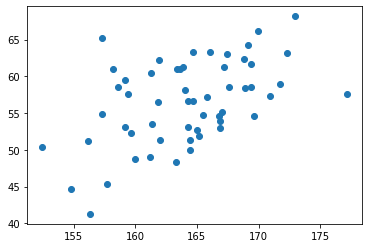

In [34]:
gen_woman= generated_df.loc[generated_df['sex_M'] !=1]
plt.scatter(gen_woman['height'],gen_woman["weight"])

Вычислить правдоподобие сгенерированных данных

Дисперсия:  63.31545871834904
Дисперсия:  137.25368429918566
Cреднее значение роста:  169.2374655787345
Cреднее значение веса:  64.95757616265468
Ковариация:  72.39004224267563


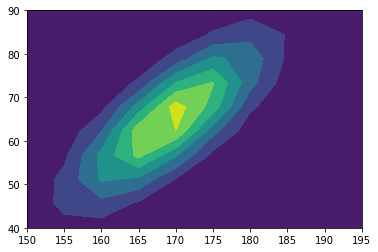

In [35]:
import scipy.stats
xw,yw = np.mgrid[150:195:10j, 40:90:10j]
matrix = np.column_stack((xw.ravel(), yw.ravel()))
pdf = getPDF(generated_df)
plt.contourf(xw, yw, pdf.reshape(xw.shape))

# Задание 2

Для начала обучим модель LinearRegression предсказывать вес по росту

In [36]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
reg_h_train=train[["height"]].values.astype(np.float)
reg_w_train=train['weight'].values.astype(np.float)

lreg.fit(reg_h_train, reg_w_train)

LinearRegression()

In [37]:
lreg_pred=lreg.predict(test[["height"]])

Графически изобразим предсказание, которое дала модель

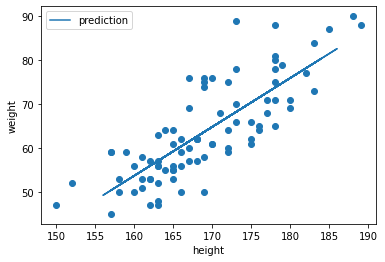

In [38]:
plt.scatter(train["height"], train['weight'])
plt.plot(test["height"], lreg_pred, label="prediction")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

Визуализируем минимизируемый критерий

In [39]:
def get_error(w_,predict_w,len_):
    err=[]
    for i in range(len_):
        err.append(1/len_*((w_[i]-predict_w[i])**2))
    return(err)

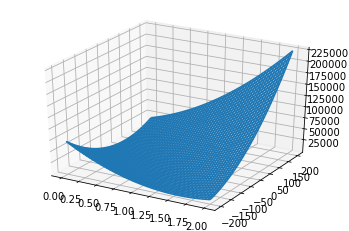

In [40]:
errs=get_error(test['weight'].values.astype(np.float),lreg_pred, len(lreg_pred ))
ww,bb = np.mgrid[0:2:200j, -200:200:200j]
err = []
h_ = train['height'].values.astype(np.float)
w_ = train['weight'].values.astype(np.float)
for w, b in zip(ww.ravel(),bb.ravel()):
    err.append(1/len(h_) * np.sum((w_ - w * h_ - b)**2))
err = np.array(err)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, err.reshape(ww.shape))

В виде контура

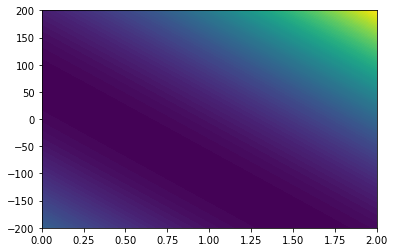

In [41]:
plt.contourf(ww,bb,err.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

Обучим модель предсказывать вес по формуле weight=w1∗height+w2∗[sex=M]+b 

In [42]:
new_train_df=train.drop(["sex_F", "repwt", "repht"], axis='columns')
new_train_df

,weight,height,sex_M
71,62,175,0
153,47,150,0
129,68,171,0
84,60,167,0
116,62,168,0
...,...,...,...
18,62,168,0
68,64,164,0
81,61,165,0
2,58,161,0


In [43]:
lr_new= LinearRegression()
lr_new.fit(new_train_df.drop(["weight"], axis=1).values.astype(np.float), new_train_df["weight"].values.astype(np.float))

LinearRegression()

In [44]:
new_test_df=test.drop(["sex_F","repwt","repht"], axis='columns')
lr_pred_new=lr_new.predict(new_test_df.drop(["weight"], axis=1).values.astype(np.float))

Проверим среднекв ошибку

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_test_df['weight'], lr_pred_new)

58.520817722706205

# Обучить градиентным спуском линейную модель

Получим необходимую тестовую выборку

In [46]:
gr_train_df=train.drop(["sex_F","sex_M","repwt","repht"], axis='columns')

Изменим масштаб данных, чтобы не застревать в плато функции

In [47]:
gr_train_df_scale = (gr_train_df - gr_train_df.mean()) / gr_train_df.std()

Визуализируем минимизируемый критерий

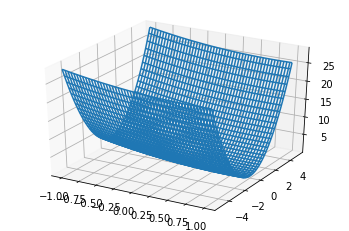

In [48]:
ww,bb = np.mgrid[-1:1:200j, -5:5:200j]
L = []
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(gr_train_df_scale['height'].values) * np.sum((gr_train_df_scale['weight'].values - w * gr_train_df_scale['height'].values - b)**2))
L = np.array(L)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

В виде контура:

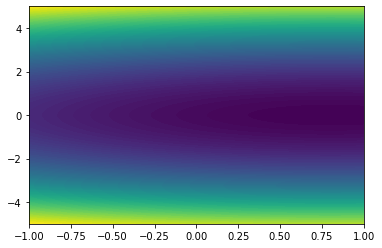

In [49]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

Применим метод градиентного спуска и найдем оптимальные параметры w и b

In [50]:
w = 1
b = 1
alpha = 0.002

x = gr_train_df_scale['height'].values
y = gr_train_df_scale['weight'].values
N = len(x)
E = 2



for i in range(9300):
    min_ = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    norm = np.sqrt(d_w**2 + d_b**2)
    
    if norm > E:
        small_n = norm / E
        d_w = d_w/ small_n
        d_b = d_b / small_n
    w = w - alpha * d_w
    b = b - alpha * d_b
print("w= {} , b = {}".format(w,b))
print("min = {}".format( min_))

w= 0.801303451589708 , b = 8.204157535189695e-09
min = 0.35365191528266265


Проверим правильно ли был найден коэффициент w

In [51]:
gr_lr = LinearRegression().fit(gr_train_df_scale['height'].values.reshape(-1,1),gr_train_df_scale['weight'].values)
gr_lr.coef_[0]

0.8013034495546296